In [4]:
import os
import pandas as pd

# Define the folder path where your CSV files are stored
folder_path = "/Users/zhangyiwei/desktop/STATS201/StockEmotions-main/price"  # Update this with the actual path

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file and read it
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Add a new column for the stock ticker (extracted from the filename)
    df["Stock"] = file.replace(".csv", "")
    
    # Append to list
    dataframes.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
print(merged_df.head())

# Save the merged dataset
merged_df.to_csv("merged_stock_prices.csv", index=False)



         Date        Open        High         Low       Close   Adj Close  \
0  2019-12-31  325.410004  326.570007  323.320007  325.760010  323.833313   
1  2020-01-02  328.549988  333.350006  327.700012  333.320007  331.348572   
2  2020-01-03  330.630005  334.890015  330.299988  332.760010  330.791901   
3  2020-01-06  329.299988  334.859985  327.880005  333.739990  331.766083   
4  2020-01-07  334.260010  344.190002  330.709991  337.279999  335.285156   

    Volume Stock  
0  4958800    BA  
1  4544400    BA  
2  3875900    BA  
3  5355000    BA  
4  9898600    BA  


In [19]:
merged_df.to_csv("/Users/zhangyiwei/desktop/STATS201/StockEmotions-main/price/merged_stock_prices.csv", index=False)

In [20]:
import pandas as pd

# Load the dataset
file_path = "/Users/zhangyiwei/desktop/STATS201/StockEmotions-main/price/merged_stock_prices.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())  # Show first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10175 non-null  object 
 1   Open       10175 non-null  float64
 2   High       10175 non-null  float64
 3   Low        10175 non-null  float64
 4   Close      10175 non-null  float64
 5   Adj Close  10175 non-null  float64
 6   Volume     10175 non-null  int64  
 7   Stock      10175 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 636.1+ KB
None
         Date        Open        High         Low       Close   Adj Close  \
0  2019-12-31  325.410004  326.570007  323.320007  325.760010  323.833313   
1  2020-01-02  328.549988  333.350006  327.700012  333.320007  331.348572   
2  2020-01-03  330.630005  334.890015  330.299988  332.760010  330.791901   
3  2020-01-06  329.299988  334.859985  327.880005  333.739990  331.766083   
4  2020-01-07  334.260010  344.190002 

In [21]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date and Stock symbol
df = df.sort_values(by=['Stock', 'Date'])

# Display first few rows
print(df.head())


           Date       Open       High        Low      Close  Adj Close  \
9159 2019-12-31  72.482498  73.419998  72.379997  73.412498  71.520821   
9160 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
9161 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441460   
9162 2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018677   
9163 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675278   

         Volume Stock  
9159  100805600  AAPL  
9160  135480400  AAPL  
9161  146322800  AAPL  
9162  118387200  AAPL  
9163  108872000  AAPL  


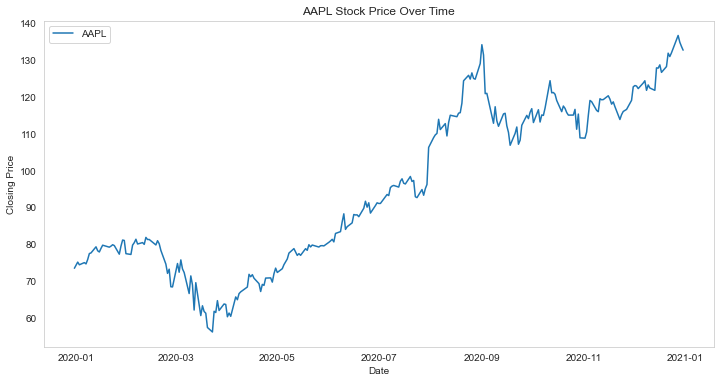

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Choose a stock (e.g., Apple)
stock_to_plot = "AAPL"

# Filter dataset
df_filtered = df[df["Stock"] == stock_to_plot]

# Plot closing price trend
plt.plot(df_filtered["Date"], df_filtered["Close"], label=stock_to_plot)

# Customize plot
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{stock_to_plot} Stock Price Over Time")
plt.legend()
plt.grid()
plt.show()


/var/folders/g6/3l63l6r946v9y5vrxmqzb86h0000gn/T/ipykernel_44927/2890201574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["50_MA"] = df_filtered["Close"].rolling(window=50).mean()
/var/folders/g6/3l63l6r946v9y5vrxmqzb86h0000gn/T/ipykernel_44927/2890201574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["200_MA"] = df_filtered["Close"].rolling(window=200).mean()


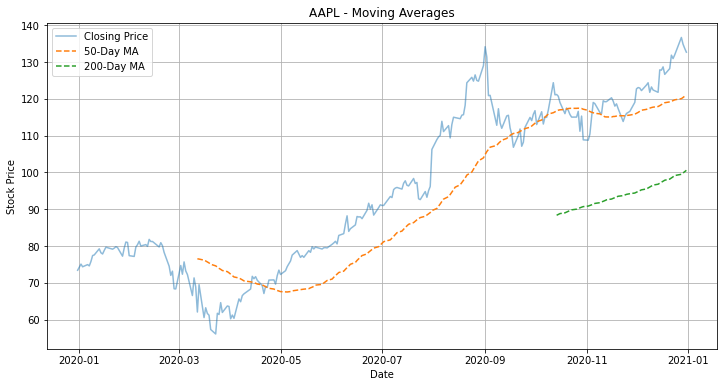

In [9]:
# Define window sizes
df_filtered["50_MA"] = df_filtered["Close"].rolling(window=50).mean()
df_filtered["200_MA"] = df_filtered["Close"].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Date"], df_filtered["Close"], label="Closing Price", alpha=0.5)
plt.plot(df_filtered["Date"], df_filtered["50_MA"], label="50-Day MA", linestyle="dashed")
plt.plot(df_filtered["Date"], df_filtered["200_MA"], label="200-Day MA", linestyle="dashed")

# Customize plot
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock_to_plot} - Moving Averages")
plt.legend()
plt.grid()
plt.show()


In [10]:
unique_stocks = df["Stock"].unique()
print(f"Total Companies: {len(unique_stocks)}")
print(f"Companies: {unique_stocks}")

Total Companies: 41
Companies: ['AAPL' 'ABNB' 'AMT' 'AMZN' 'BA' 'BABA' 'BAC' 'BKNG' 'BRK-A' 'BRK-B' 'CCL'
 'CVX' 'DIS' 'FB' 'GOOG' 'GOOGL' 'HD' 'JNJ' 'JPM' 'KO' 'LOW' 'MA' 'MCD'
 'META' 'MSFT' 'NFLX' 'NKE' 'NVDA' 'PFE' 'PG' 'PYPL' 'SBUX' 'TM' 'TSLA'
 'TSM' 'UNH' 'UPS' 'V' 'WMT' 'XOM' '^GSPC']


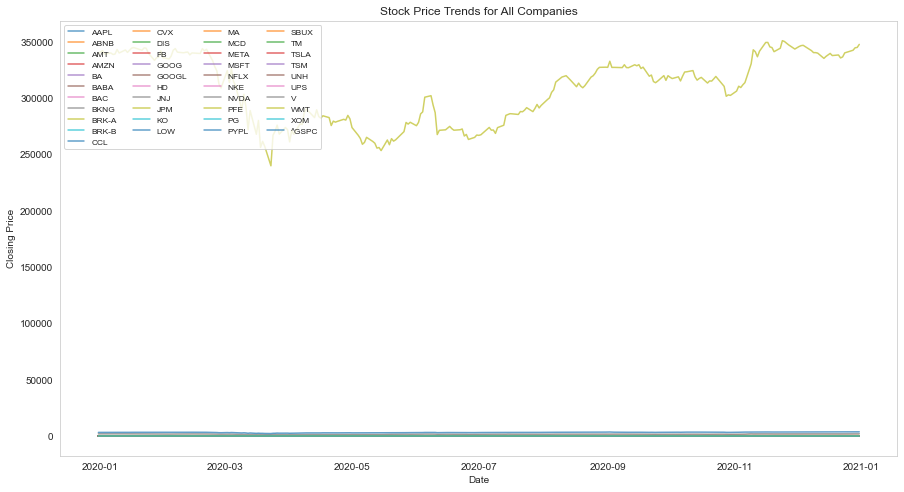

In [23]:
plt.figure(figsize=(15, 8))

# Loop through each unique stock and plot its closing price trend
for stock in unique_stocks:
    stock_df = df[df["Stock"] == stock]
    plt.plot(stock_df["Date"], stock_df["Close"], label=stock, alpha=0.7)

# Customize plot
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends for All Companies")
plt.legend(loc="upper left", fontsize="small", ncol=4)  # Adjust legend position and size
plt.grid()
plt.show()


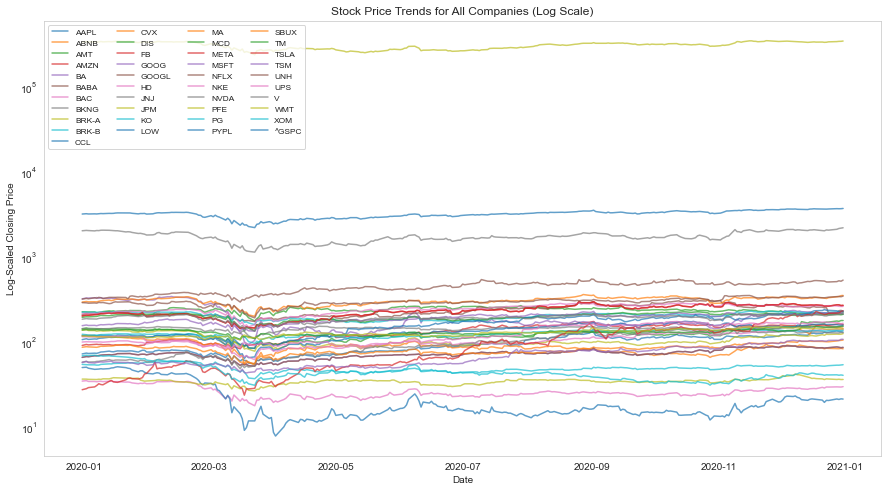

In [24]:
plt.figure(figsize=(15, 8))

for stock in unique_stocks:
    stock_df = df[df["Stock"] == stock]
    plt.plot(stock_df["Date"], stock_df["Close"], label=stock, alpha=0.7)

# Set log scale
plt.yscale("log")

# Customize plot
plt.xlabel("Date")
plt.ylabel("Log-Scaled Closing Price")
plt.title("Stock Price Trends for All Companies (Log Scale)")
plt.legend(loc="upper left", fontsize="small", ncol=4)
plt.grid()
plt.show()


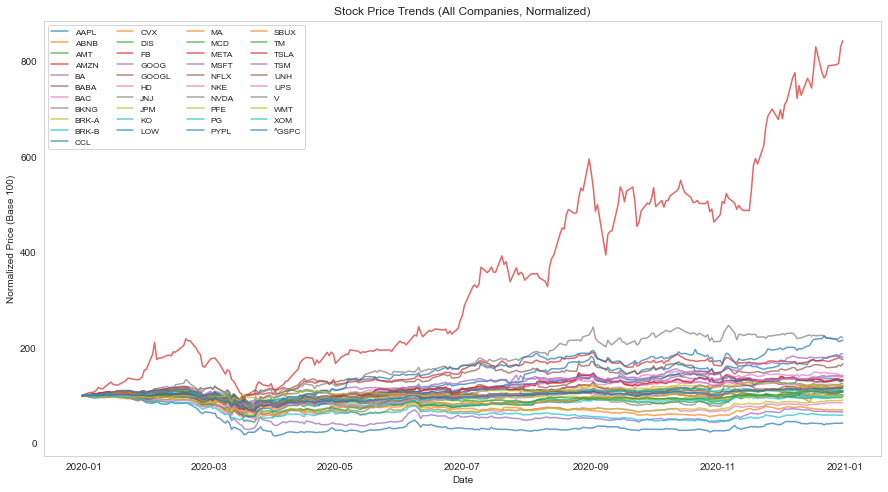

In [16]:
plt.figure(figsize=(15, 8))

for stock in unique_stocks:
    stock_df = df[df["Stock"] == stock].copy()  # Copy to avoid modifying the original data
    stock_df["Normalized_Price"] = stock_df["Close"] / stock_df["Close"].iloc[0] * 100  # Normalize
    
    plt.plot(stock_df["Date"], stock_df["Normalized_Price"], label=stock, alpha=0.7)

# Customize plot
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base 100)")
plt.title("Stock Price Trends (All Companies, Normalized)")
plt.legend(loc="upper left", fontsize="small", ncol=4)
plt.grid()
plt.show()


ERROR: Could not find a version that satisfies the requirement pycaret (from versions: none)
ERROR: No matching distribution found for pycaret
